In [67]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json,os,pdb
import tqdm
import yfinance as yf

In [68]:
df1=pd.read_csv ('clean_df.csv')

In [69]:
df1.set_index(['symbol_id'],inplace=True)
df1.columns = [c.replace(' ', '_') for c in df1.columns]
df1

,time_close,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,10Y_Treasury,Gold,Oil,EUR_USD
symbol_id,,,,,,,,,,,,,,,,,
BTCB_4023,2020-09-24,10475.684721,1.138708e+04,0.000000e+00,9,24,3,1,-0.010546,1.915524,0.039526,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
BTCB_4023,2020-09-25,10889.743248,1.384086e+03,0.000000e+00,9,25,4,1,0.039526,-0.878451,-0.029131,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-26,10572.518703,3.690903e+03,0.000000e+00,9,26,5,0,-0.029131,1.666671,0.019034,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-27,10773.752004,6.771302e+03,0.000000e+00,9,27,6,0,0.019034,0.834592,0.006752,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
BTCB_4023,2020-09-28,10846.499092,3.646642e+03,0.000000e+00,9,28,0,1,0.006752,-0.461456,-0.013387,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FTT_4195,2022-09-29,24.068050,7.976498e+07,3.224523e+09,9,29,3,1,0.015881,-0.219820,0.009143,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
FTT_4195,2022-09-30,24.288116,7.723532e+07,3.254006e+09,9,30,4,1,0.009143,-0.031714,-0.002232,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
FTT_4195,2022-10-01,24.233912,7.605522e+07,3.246744e+09,10,1,5,0,-0.002232,-0.015279,0.000811,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [70]:
dfcoin=df1.loc['XMR_328']
dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)
dfcoin.set_index(['time_close'],inplace=True)
dfcoin

/tmp/ipykernel_6421/2305753644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoin.rename(columns={'10Y_Treasury':'TY_Treasury'}, inplace=True)


,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,SPY,VIX,TY_Treasury,Gold,Oil,EUR_USD
time_close,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,314.251007,28.510000,0.666,1868.300049,40.310001,1.165854
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,319.331482,26.379999,0.659,1857.699951,40.250000,1.167324
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,324.635376,26.190001,0.663,1872.800049,40.599998,1.163535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,362.790009,31.840000,3.747,1658.500000,81.230003,0.970817
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,357.179993,31.620001,3.804,1662.400024,79.489998,0.982956


In [71]:
#Adding other coins in regression
dfBTC=df1.loc['BTC_1']
dfBTC.set_index(['time_close'],inplace=True)
dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
dfBTC1=dfBTC['BTC_close']

dfETH=df1.loc['ETH_1027']
dfETH.set_index(['time_close'],inplace=True)
dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
dfETH1=dfETH['ETH_close']

dfLTC=df1.loc['LTC_2']
dfLTC.set_index(['time_close'],inplace=True)
dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)
dfLTC1=dfLTC['LTC_close']

dfXRP=df1.loc['XRP_52']
dfXRP.set_index(['time_close'],inplace=True)
dfXRP.rename(columns={'close':'XRP_close'}, inplace=True)
dfXRP1=dfXRP['XRP_close']

dfXLM=df1.loc['XLM_512']
dfXLM.set_index(['time_close'],inplace=True)
dfXLM.rename(columns={'close':'XLM_close'}, inplace=True)
dfXLM1=dfXLM['XLM_close']

dfDOGE=df1.loc['DOGE_74']
dfDOGE.set_index(['time_close'],inplace=True)
dfDOGE.rename(columns={'close':'DOGE_close'}, inplace=True)
dfDOGE1=dfDOGE['DOGE_close']

df2=pd.concat([dfcoin,dfBTC1,dfETH1,dfLTC1,dfXRP1,dfXLM1,dfDOGE1],axis=1)
df2

/tmp/ipykernel_6421/611212251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBTC.rename(columns={'close':'BTC_close'}, inplace=True)
/tmp/ipykernel_6421/611212251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfETH.rename(columns={'close':'ETH_close'}, inplace=True)
/tmp/ipykernel_6421/611212251.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLTC.rename(columns={'close':'LTC_close'}, inplace=True)
/tmp/ipykernel_642

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,TY_Treasury,Gold,Oil,EUR_USD,BTC_close,ETH_close,LTC_close,XRP_close,XLM_close,DOGE_close
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,...,0.666,1868.300049,40.310001,1.165854,10295.054804,322.801017,43.575650,0.222924,0.068613,0.002575
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,0.659,1857.699951,40.250000,1.167324,10773.534000,348.029329,44.790372,0.231864,0.070204,0.002629
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,0.659,1857.699951,40.250000,1.167324,10668.141934,351.552190,46.090238,0.243233,0.074894,0.002701
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,0.659,1857.699951,40.250000,1.167324,10769.604523,359.182175,46.340146,0.243122,0.074085,0.002722
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,0.663,1872.800049,40.599998,1.163535,10881.984006,358.283277,46.434781,0.244379,0.074022,0.002736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,...,3.747,1658.500000,81.230003,0.970817,19445.124438,1333.964086,53.258766,0.447573,0.108473,0.060484
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,...,3.804,1662.400024,79.489998,0.982956,19532.627889,1336.776474,53.855640,0.480514,0.114305,0.060628
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,...,3.804,1662.400024,79.489998,0.982956,19400.000434,1327.829013,53.365201,0.475265,0.114461,0.062382


EDA for XMR

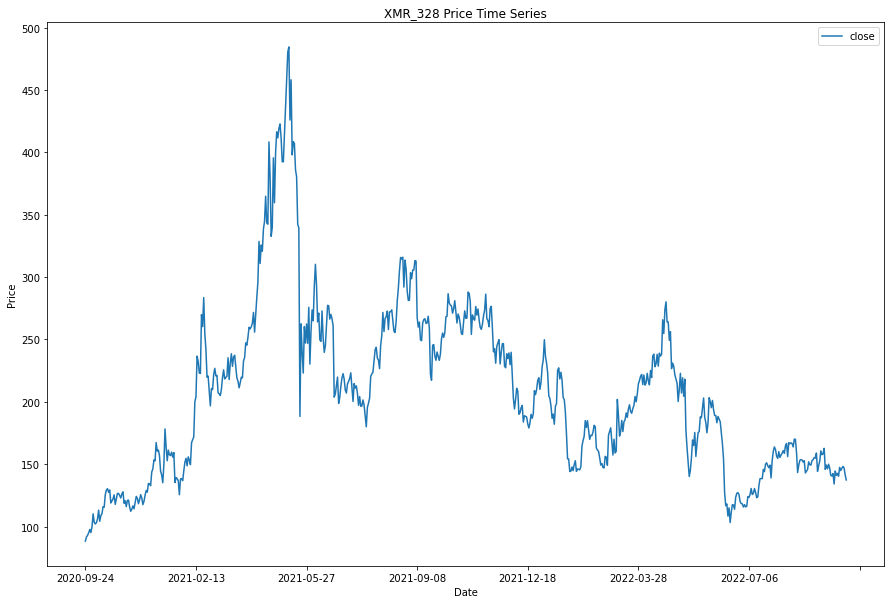

In [76]:
df2.plot(y=['close'], logy=False, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XMR_328 Price Time Series')
plt.show()

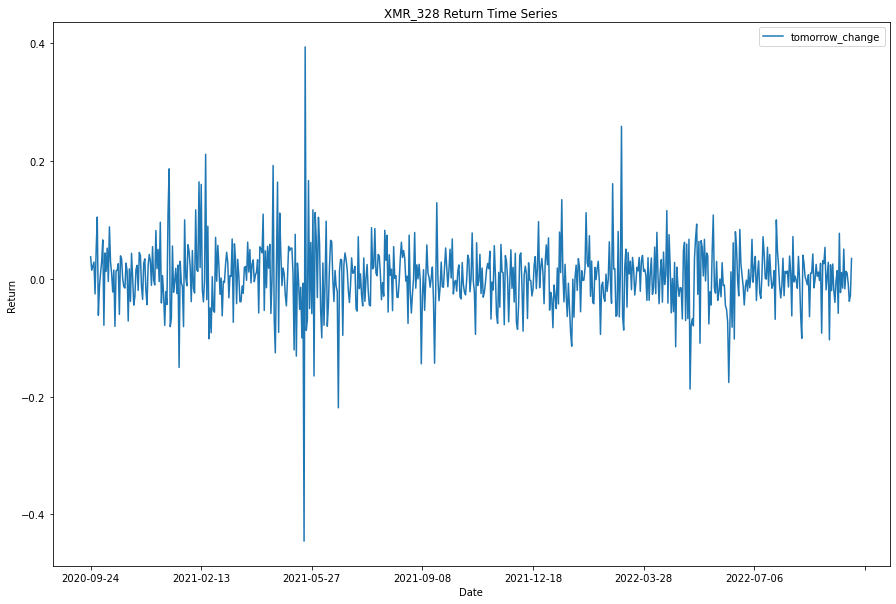

In [78]:
df2.plot(y=['tomorrow_change'], logy=False, figsize=(15, 10))
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('XMR_328 Return Time Series')
plt.show()

Test for stationarity

In [8]:
from statsmodels.tsa.stattools import adfuller
List=['tomorrow_change','volume','SPY','VIX','TY_Treasury','Gold','Oil','EUR_USD','BTC_close','ETH_close','LTC_close','XLM_close',
     'XRP_close','DOGE_close']
for i in List:
    timeseries = df2[i].dropna()
    result = adfuller(timeseries)
    print(i+' ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('\n')



tomorrow_change ADF Statistic: -8.507309
p-value: 0.000000


volume ADF Statistic: -1.919940
p-value: 0.322740


SPY ADF Statistic: -2.300683
p-value: 0.171748


VIX ADF Statistic: -4.320312
p-value: 0.000410


TY_Treasury ADF Statistic: 0.307875
p-value: 0.977703


Gold ADF Statistic: -2.125103
p-value: 0.234541


Oil ADF Statistic: -1.902342
p-value: 0.330960


EUR_USD ADF Statistic: 0.643501
p-value: 0.988640


BTC_close ADF Statistic: -1.734784
p-value: 0.413286


ETH_close ADF Statistic: -1.936253
p-value: 0.315203


LTC_close ADF Statistic: -1.541748
p-value: 0.512768


XLM_close ADF Statistic: -1.599030
p-value: 0.484081


XRP_close ADF Statistic: -2.284897
p-value: 0.176885


DOGE_close ADF Statistic: -2.294981
p-value: 0.173592




tomorrow_change and VIX are stationary.

In [9]:
#Use percentage change for nonstationary variables
df2['SPY_change']=df2['SPY'].pct_change()
df2['Gold_change']=df2['Gold'].pct_change()
df2['Oil_change']=df2['Oil'].pct_change()
df2['BTC_change']=df2['BTC_close'].pct_change()
df2['ETH_change']=df2['ETH_close'].pct_change()
df2['LTC_change']=df2['LTC_close'].pct_change()
df2['XLM_change']=df2['XLM_close'].pct_change()
df2['XRP_change']=df2['XRP_close'].pct_change()
df2['DOGE_change']=df2['DOGE_close'].pct_change()
df2

,close,volume,marketcap,month,day,weekday,day_of_week,price_change,volume_change,tomorrow_change,...,DOGE_close,SPY_change,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change,DOGE_change
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-24,88.404357,4.303256e+08,1.565376e+09,9,24,3,1,-0.051886,-0.024352,0.037234,...,0.002575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,91.695987,4.522771e+08,1.623757e+09,9,25,4,1,0.037234,0.051011,0.014505,...,0.002629,0.016167,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102,0.021075
2020-09-26,93.026053,4.527975e+08,1.647404e+09,9,26,5,0,0.014505,0.001151,0.021696,...,0.002701,0.000000,0.000000,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036,0.027243
2020-09-27,95.044383,3.987622e+08,1.683241e+09,9,27,6,0,0.021696,-0.119337,0.028372,...,0.002722,0.000000,0.000000,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456,0.007860
2020-09-28,97.741001,5.537611e+08,1.731099e+09,9,28,0,1,0.028372,0.388700,-0.025720,...,0.002736,0.016609,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170,0.005012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,146.795038,8.460849e+07,2.668801e+09,9,29,3,1,0.012601,-0.115342,0.009835,...,0.060484,-0.020889,-0.001144,-0.011199,0.017353,0.000887,0.012806,-0.014612,0.004518,-0.003809
2022-09-30,148.238784,8.206135e+07,2.695116e+09,9,30,4,1,0.009835,-0.030105,-0.008111,...,0.060628,-0.015464,0.002352,-0.021421,0.004500,0.002108,0.011207,0.053767,0.073597,0.002384
2022-10-01,147.036460,6.591437e+07,2.673323e+09,10,1,5,0,-0.008111,-0.196767,-0.038118,...,0.062382,0.000000,0.000000,0.000000,-0.006790,-0.006693,-0.009107,0.001370,-0.010923,0.028931


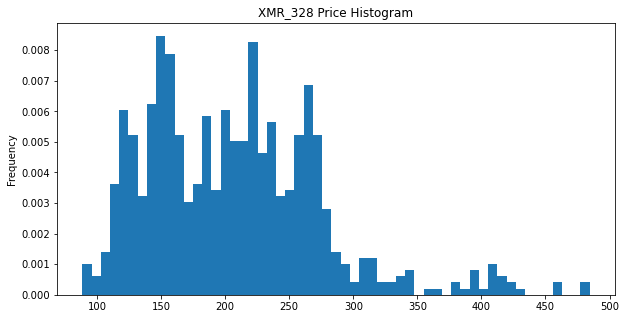

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))
df2['close'].plot.hist(density=1, bins=55, ax=ax)
plt.title('XMR_328 Price Histogram')
plt.show() 

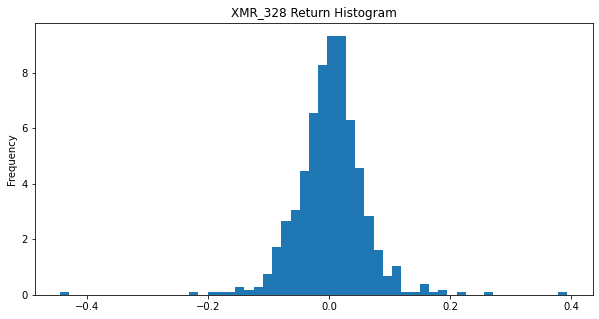

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))
df2['tomorrow_change'].plot.hist(density=1, bins=55, ax=ax)
plt.title('XMR_328 Return Histogram')
plt.show() 

In [12]:
dfreg=df2[['tomorrow_change','weekday','price_change','volume_change','SPY_change','VIX','Gold_change','Oil_change',
           'BTC_change','ETH_change','LTC_change','XLM_change','XRP_change','DOGE_change']]

In [13]:
dfreg.head()

,tomorrow_change,weekday,price_change,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change,DOGE_change
time_close,,,,,,,,,,,,,,
2020-09-24,0.037234,3,-0.051886,-0.024352,NaN,28.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,0.014505,4,0.037234,0.051011,0.016167,26.379999,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102,0.021075
2020-09-26,0.021696,5,0.014505,0.001151,0.000000,26.379999,0.000000,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036,0.027243
2020-09-27,0.028372,6,0.021696,-0.119337,0.000000,26.379999,0.000000,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456,0.007860
2020-09-28,-0.025720,0,0.028372,0.388700,0.016609,26.190001,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170,0.005012


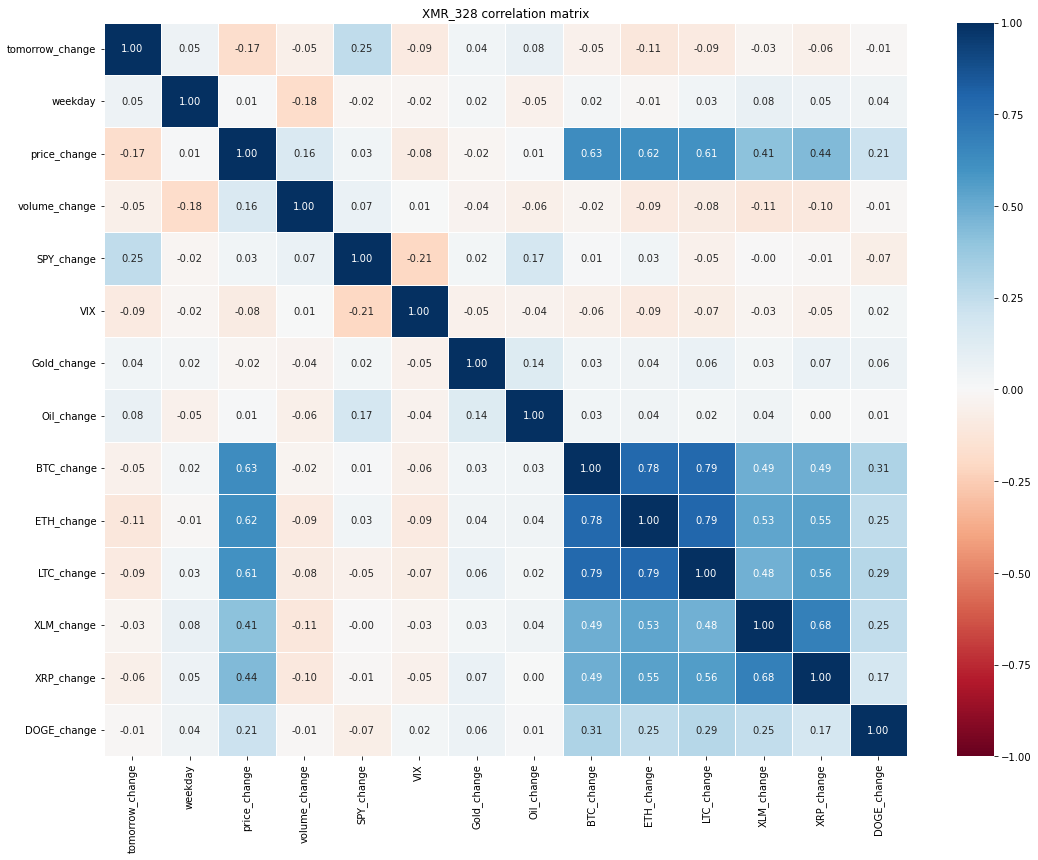

In [14]:
fig, ax = plt.subplots(figsize = (18, 13.5))
corrmat = dfreg.corr()
sns.heatmap(corrmat, cmap="RdBu", linewidths=.5, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('XMR_328 correlation matrix')
plt.show()

In [15]:
dfreg.drop(dfreg.head(1).index, inplace=True)
dfreg.head()

/tmp/ipykernel_6421/2663260068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg.drop(dfreg.head(1).index, inplace=True)


,tomorrow_change,weekday,price_change,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change,DOGE_change
time_close,,,,,,,,,,,,,,
2020-09-25,0.014505,4,0.037234,0.051011,0.016167,26.379999,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102,0.021075
2020-09-26,0.021696,5,0.014505,0.001151,0.000000,26.379999,0.000000,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036,0.027243
2020-09-27,0.028372,6,0.021696,-0.119337,0.000000,26.379999,0.000000,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456,0.007860
2020-09-28,-0.025720,0,0.028372,0.388700,0.016609,26.190001,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170,0.005012
2020-09-29,0.048048,1,-0.025720,-0.135473,-0.005446,26.270000,0.011480,-0.032266,-0.014901,-0.008407,-0.013785,-0.003863,-0.007553,-0.022978


In [16]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

X = dfreg.copy()
y = X.pop('tomorrow_change')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
#Scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
factors = ['price_change','SPY_change','volume_change','VIX','Gold_change','Oil_change',
           'BTC_change','ETH_change','LTC_change','XLM_change','XRP_change','DOGE_change']
scaler=StandardScaler()
X_train = pd.DataFrame(X_train[factors].copy())
X_train[factors] = scaler.fit_transform(X_train[factors])
X_test = pd.DataFrame(X_test[factors].copy())
X_test[factors] = scaler.transform(X_test[factors])

In [18]:
#X_train

In [19]:
#X_test

Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [21]:
#from sklearn import linear_model
#reg = linear_model.LinearRegression()
#reg.fit(X_train,y_train)
#LinearRegression()
#reg.coef_

In [22]:
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)

In [23]:
model.coef_

array([-0.01367639,  0.01319651, -0.00179176, -0.00379264,  0.00069513,
        0.00221624,  0.01025077, -0.01061435,  0.00032549,  0.00376281,
       -0.0001463 ,  0.00186622])

              Actual  Predicted
time_close                     
2022-05-18 -0.109457  -0.079501
2022-05-19  0.064800   0.014328
2022-05-20  0.053748  -0.011303
2022-05-21  0.004827  -0.022924
2022-05-22  0.067004   0.001007
...              ...        ...
2022-09-29  0.009835  -0.035319
2022-09-30 -0.008111  -0.027984
2022-10-01 -0.038118  -0.001433
2022-10-02 -0.028520   0.008153
2022-10-03  0.034424   0.002289

[138 rows x 2 columns]
Coefficient of determination: 0.15


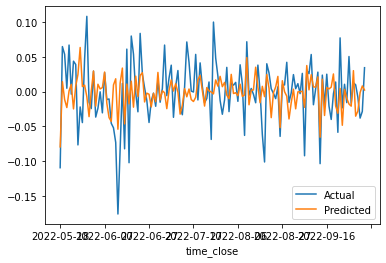

In [24]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
ax = df_pred.plot()

Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42,min_samples_leaf=10)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

In [27]:
y_pred1 = tree_reg.predict(X_test)

              Actual  Predicted
time_close                     
2022-05-18 -0.109457  -0.073786
2022-05-19  0.064800   0.008565
2022-05-20  0.053748   0.008565
2022-05-21  0.004827   0.008565
2022-05-22  0.067004   0.008565
...              ...        ...
2022-09-29  0.009835  -0.073786
2022-09-30 -0.008111  -0.005075
2022-10-01 -0.038118   0.008565
2022-10-02 -0.028520   0.008565
2022-10-03  0.034424   0.008565

[138 rows x 2 columns]
Coefficient of determination: 0.15


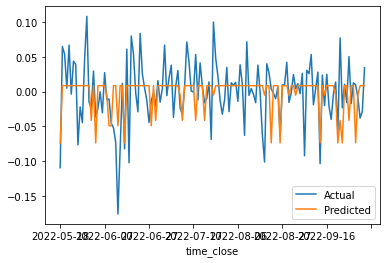

In [28]:
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred1.squeeze()})
print(df_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
ax = df_pred.plot()

In [29]:
#from sklearn.svm import SVR
#from sklearn.ensemble import BaggingRegressor
#from sklearn.datasets import make_regression

In [30]:
#X_train, y_train = make_regression(n_samples=550, n_features=11,
                        #n_informative=2, n_targets=1,
                        #random_state=42, shuffle=False)
#regr = BaggingRegressor(base_estimator=SVR(),
                        #n_estimators=8, random_state=42).fit(X_train, y_train)
#y_pred2=regr.predict(X_test)


In [31]:
#df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred2.squeeze()})
#print(df_pred)
#print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
#ax = df_pred.plot()

Try to use polynomial terms

In [32]:
from sklearn.linear_model import LinearRegression

                 tomorrow_change  SPY_change
tomorrow_change         1.000000    0.252354
SPY_change              0.252354    1.000000
                 tomorrow_change       VIX
tomorrow_change         1.000000 -0.091622
VIX                    -0.091622  1.000000
                 tomorrow_change  Gold_change
tomorrow_change         1.000000     0.038637
Gold_change             0.038637     1.000000
                 tomorrow_change  Oil_change
tomorrow_change         1.000000    0.077106
Oil_change              0.077106    1.000000
                 tomorrow_change  BTC_change
tomorrow_change         1.000000   -0.053181
BTC_change             -0.053181    1.000000
                 tomorrow_change  ETH_change
tomorrow_change         1.000000   -0.113328
ETH_change             -0.113328    1.000000
                 tomorrow_change  LTC_change
tomorrow_change         1.000000   -0.092152
LTC_change             -0.092152    1.000000
                 tomorrow_change  XLM_change
tomorrow_chan

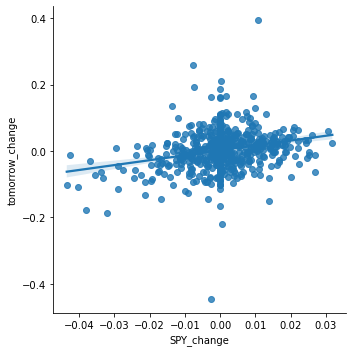

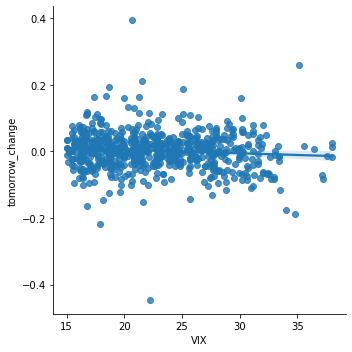

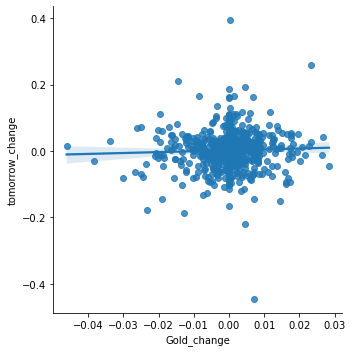

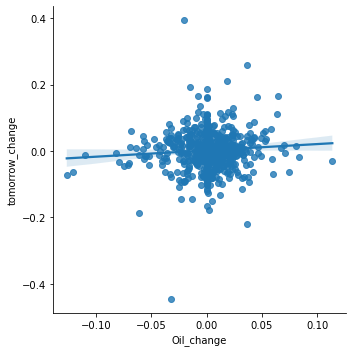

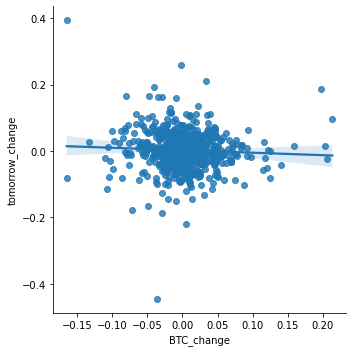

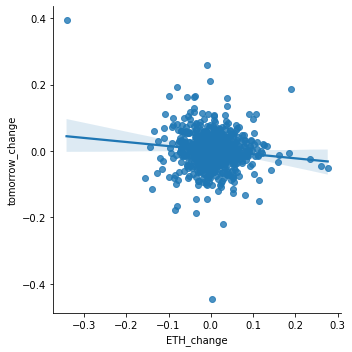

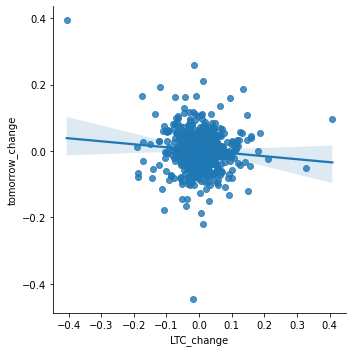

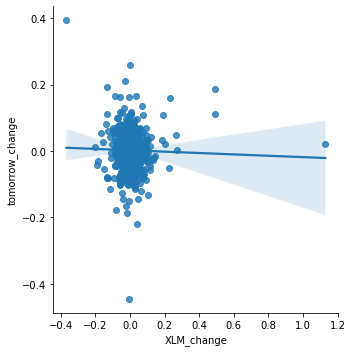

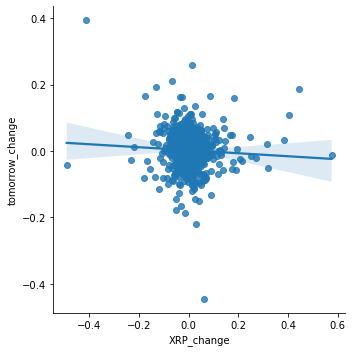

In [33]:
for i in ['SPY_change', 'VIX','Gold_change','Oil_change',
           'BTC_change','ETH_change','LTC_change','XLM_change','XRP_change']:
    print(dfreg[['tomorrow_change',i]].corr(method = 'pearson'))
    plot = sns.lmplot(y='tomorrow_change',x=i,data=dfreg) 

Find no pattern of polynomial.

Logistic Regression

In [34]:
dfreg

,tomorrow_change,weekday,price_change,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,LTC_change,XLM_change,XRP_change,DOGE_change
time_close,,,,,,,,,,,,,,
2020-09-25,0.014505,4,0.037234,0.051011,0.016167,26.379999,-0.005674,-0.001488,0.046477,0.078154,0.027876,0.023188,0.040102,0.021075
2020-09-26,0.021696,5,0.014505,0.001151,0.000000,26.379999,0.000000,0.000000,-0.009782,0.010122,0.029021,0.066801,0.049036,0.027243
2020-09-27,0.028372,6,0.021696,-0.119337,0.000000,26.379999,0.000000,0.000000,0.009511,0.021704,0.005422,-0.010805,-0.000456,0.007860
2020-09-28,-0.025720,0,0.028372,0.388700,0.016609,26.190001,0.008128,0.008696,0.010435,-0.002503,0.002042,-0.000851,0.005170,0.005012
2020-09-29,0.048048,1,-0.025720,-0.135473,-0.005446,26.270000,0.011480,-0.032266,-0.014901,-0.008407,-0.013785,-0.003863,-0.007553,-0.022978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.009835,3,0.012601,-0.115342,-0.020889,31.840000,-0.001144,-0.011199,0.017353,0.000887,0.012806,-0.014612,0.004518,-0.003809
2022-09-30,-0.008111,4,0.009835,-0.030105,-0.015464,31.620001,0.002352,-0.021421,0.004500,0.002108,0.011207,0.053767,0.073597,0.002384
2022-10-01,-0.038118,5,-0.008111,-0.196767,0.000000,31.620001,0.000000,0.000000,-0.006790,-0.006693,-0.009107,0.001370,-0.010923,0.028931


Create Dummy variables

In [35]:
dfreg['TomorrowTrend'] = pd.cut(x=dfreg['tomorrow_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Tomorrow'] = dfreg['TomorrowTrend'].map({'Decrease':0,'Increase':1})
dfreg['Tomorrow'] = dfreg['Tomorrow'].astype(float)

/tmp/ipykernel_6421/3857740158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['TomorrowTrend'] = pd.cut(x=dfreg['tomorrow_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/3857740158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['Tomorrow'] = dfreg['TomorrowTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/3857740158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [36]:
dfreg['PriceTrend'] = pd.cut(x=dfreg['price_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Price'] = dfreg['PriceTrend'].map({'Decrease':0,'Increase':1})
dfreg['Price'] = dfreg['Price'].astype(float)

/tmp/ipykernel_6421/2198849418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['PriceTrend'] = pd.cut(x=dfreg['price_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/2198849418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['Price'] = dfreg['PriceTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/2198849418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [37]:
dfreg['VolumeTrend'] = pd.cut(x=dfreg['volume_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Volume'] = dfreg['VolumeTrend'].map({'Decrease':0,'Increase':1})
dfreg['Volume'] = dfreg['Volume'].astype(float)

/tmp/ipykernel_6421/1703540036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['VolumeTrend'] = pd.cut(x=dfreg['volume_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/1703540036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['Volume'] = dfreg['VolumeTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/1703540036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [38]:
dfreg['BTCTrend'] = pd.cut(x=dfreg['BTC_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['BTC'] = dfreg['BTCTrend'].map({'Decrease':0,'Increase':1})
dfreg['BTC'] = dfreg['BTC'].astype(float)

/tmp/ipykernel_6421/2127056138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['BTCTrend'] = pd.cut(x=dfreg['BTC_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/2127056138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['BTC'] = dfreg['BTCTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/2127056138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [39]:
dfreg['ETHTrend'] = pd.cut(x=dfreg['ETH_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['ETH'] = dfreg['ETHTrend'].map({'Decrease':0,'Increase':1})
dfreg['ETH'] = dfreg['ETH'].astype(float)

/tmp/ipykernel_6421/2496602664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['ETHTrend'] = pd.cut(x=dfreg['ETH_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/2496602664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['ETH'] = dfreg['ETHTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/2496602664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [40]:
dfreg['LTCTrend'] = pd.cut(x=dfreg['LTC_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['LTC'] = dfreg['LTCTrend'].map({'Decrease':0,'Increase':1})
dfreg['LTC'] = dfreg['LTC'].astype(float)

/tmp/ipykernel_6421/4243148350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['LTCTrend'] = pd.cut(x=dfreg['LTC_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/4243148350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['LTC'] = dfreg['LTCTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/4243148350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [41]:
dfreg['SPYTrend'] = pd.cut(x=dfreg['SPY_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['SPY'] = dfreg['SPYTrend'].map({'Decrease':0,'Increase':1})
dfreg['SPY'] = dfreg['SPY'].astype(float)

/tmp/ipykernel_6421/49939850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['SPYTrend'] = pd.cut(x=dfreg['SPY_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/49939850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['SPY'] = dfreg['SPYTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/49939850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [42]:
dfreg['GoldTrend'] = pd.cut(x=dfreg['Gold_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Gold'] = dfreg['GoldTrend'].map({'Decrease':0,'Increase':1})
dfreg['Gold'] = dfreg['Gold'].astype(float)

/tmp/ipykernel_6421/1044427799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['GoldTrend'] = pd.cut(x=dfreg['Gold_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/1044427799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['Gold'] = dfreg['GoldTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/1044427799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [43]:
dfreg['OilTrend'] = pd.cut(x=dfreg['Oil_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['Oil'] = dfreg['OilTrend'].map({'Decrease':0,'Increase':1})
dfreg['Oil'] = dfreg['Oil'].astype(float)

/tmp/ipykernel_6421/2392267449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['OilTrend'] = pd.cut(x=dfreg['Oil_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/2392267449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['Oil'] = dfreg['OilTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/2392267449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [44]:
dfreg['XLMTrend'] = pd.cut(x=dfreg['XLM_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['XLM'] = dfreg['XLMTrend'].map({'Decrease':0,'Increase':1})
dfreg['XLM'] = dfreg['XLM'].astype(float)

/tmp/ipykernel_6421/980970877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['XLMTrend'] = pd.cut(x=dfreg['XLM_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/980970877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['XLM'] = dfreg['XLMTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/980970877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [45]:
dfreg['XRPTrend'] = pd.cut(x=dfreg['XRP_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
dfreg['XRP'] = dfreg['XRPTrend'].map({'Decrease':0,'Increase':1})
dfreg['XRP'] = dfreg['XRP'].astype(float)

/tmp/ipykernel_6421/1990995862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['XRPTrend'] = pd.cut(x=dfreg['XRP_change'], bins=[-10,0,10], labels=['Decrease','Increase'])
/tmp/ipykernel_6421/1990995862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['XRP'] = dfreg['XRPTrend'].map({'Decrease':0,'Increase':1})
/tmp/ipykernel_6421/1990995862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [47]:
dfreg.head()

,tomorrow_change,weekday,price_change,volume_change,SPY_change,VIX,Gold_change,Oil_change,BTC_change,ETH_change,...,SPYTrend,SPY,GoldTrend,Gold,OilTrend,Oil,XLMTrend,XLM,XRPTrend,XRP
time_close,,,,,,,,,,,,,,,,,,,,,
2020-09-25,0.014505,4,0.037234,0.051011,0.016167,26.379999,-0.005674,-0.001488,0.046477,0.078154,...,Increase,1.0,Decrease,0.0,Decrease,0.0,Increase,1.0,Increase,1.0
2020-09-26,0.021696,5,0.014505,0.001151,0.000000,26.379999,0.000000,0.000000,-0.009782,0.010122,...,Decrease,0.0,Decrease,0.0,Decrease,0.0,Increase,1.0,Increase,1.0
2020-09-27,0.028372,6,0.021696,-0.119337,0.000000,26.379999,0.000000,0.000000,0.009511,0.021704,...,Decrease,0.0,Decrease,0.0,Decrease,0.0,Decrease,0.0,Decrease,0.0
2020-09-28,-0.025720,0,0.028372,0.388700,0.016609,26.190001,0.008128,0.008696,0.010435,-0.002503,...,Increase,1.0,Increase,1.0,Increase,1.0,Decrease,0.0,Increase,1.0
2020-09-29,0.048048,1,-0.025720,-0.135473,-0.005446,26.270000,0.011480,-0.032266,-0.014901,-0.008407,...,Decrease,0.0,Increase,1.0,Decrease,0.0,Decrease,0.0,Decrease,0.0


In [48]:
dflog=dfreg[['weekday','Price','Volume','BTC','ETH','LTC','SPY','Gold','Oil','Tomorrow','XLM','XRP']]

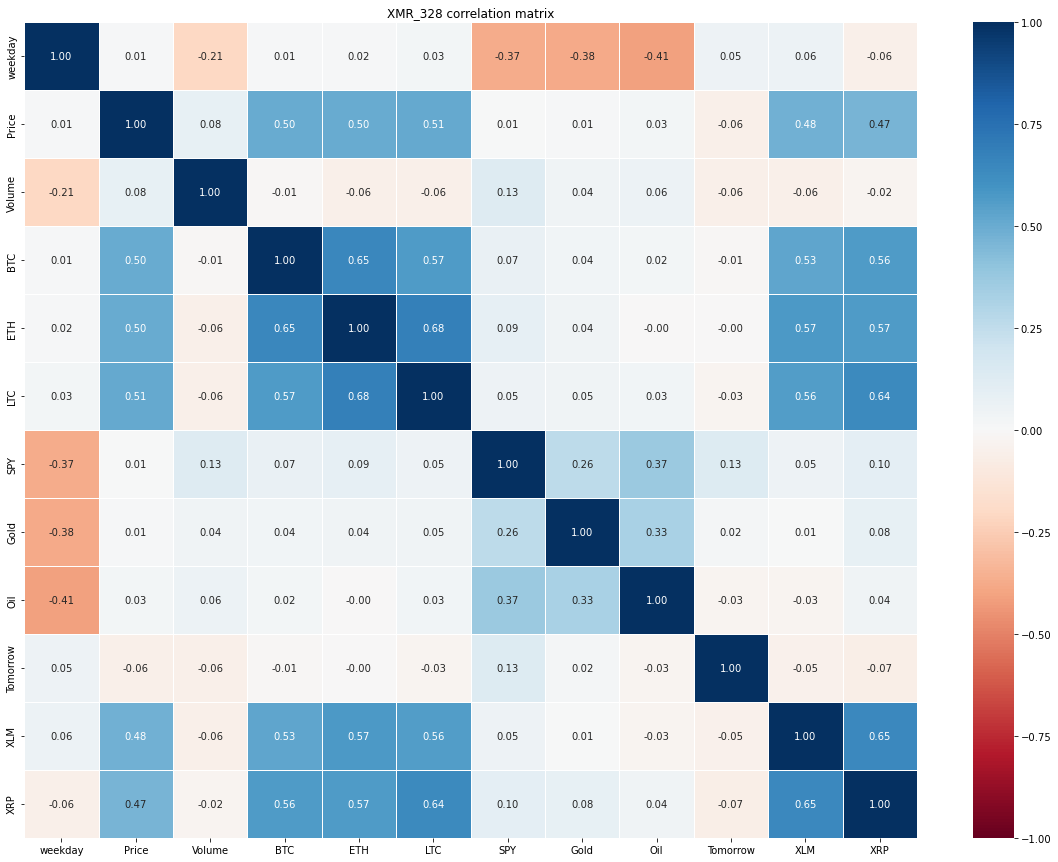

In [49]:
fig, ax = plt.subplots(figsize = (20, 15))
corrmat = dflog.corr()
sns.heatmap(corrmat, cmap="RdBu", linewidths=.5, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('XMR_328 correlation matrix')
plt.show()

In [50]:
#Divide into train and test data
from sklearn.model_selection import train_test_split

X = dfreg[['weekday','Price','Volume','BTC','ETH','LTC','SPY','Gold','Oil','Tomorrow','XLM','XRP']]
y = X.pop('Tomorrow')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=False)
X_train

,weekday,Price,Volume,BTC,ETH,LTC,SPY,Gold,Oil,XLM,XRP
time_close,,,,,,,,,,,
2020-09-25,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2020-09-26,5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2020-09-27,6,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-09-28,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2020-09-29,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-13,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2022-05-14,5,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2022-05-15,6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
logisticRegr = LogisticRegression()
model = logisticRegr.fit(X_train, y_train)
y_pred2=logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.5652173913043478


Classification

In [52]:
#Fitting a single decision tree classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


from io import StringIO
import seaborn as sns
from ipywidgets import Image
import pydotplus 

In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

In [54]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

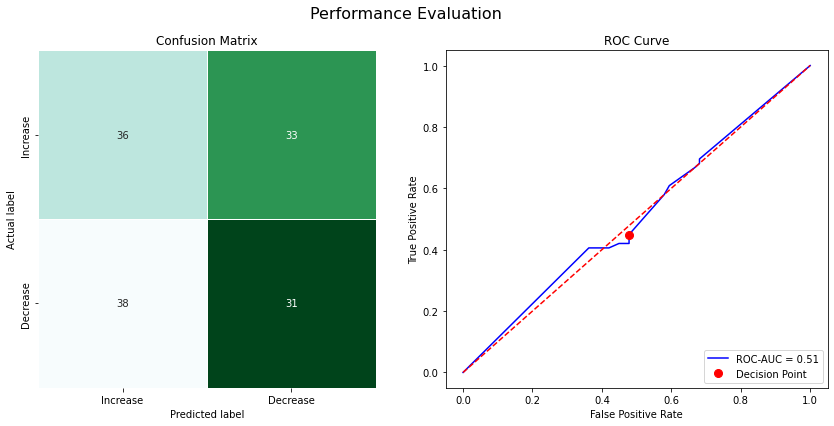

In [55]:
LABELS = ['Increase', 'Decrease']
tree_perf = performance_evaluation_report(tree_classifier, 
                                          X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()
plt.show()

In [56]:
tree_perf

{'accuracy': 0.4855072463768116,
 'precision': 0.484375,
 'recall': 0.4492753623188406,
 'specificity': 0.5217391304347826,
 'f1_score': 0.4661654135338346,
 'cohens_kappa': -0.02898550724637672,
 'roc_auc': 0.5082965763495064,
 'pr_auc': 0.6063953417149468}

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=10, n_jobs=-1, random_state=42)
#rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
 #min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
 #bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
 #class_weight=None, ccp_alpha=0.0, max_samples=None)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)



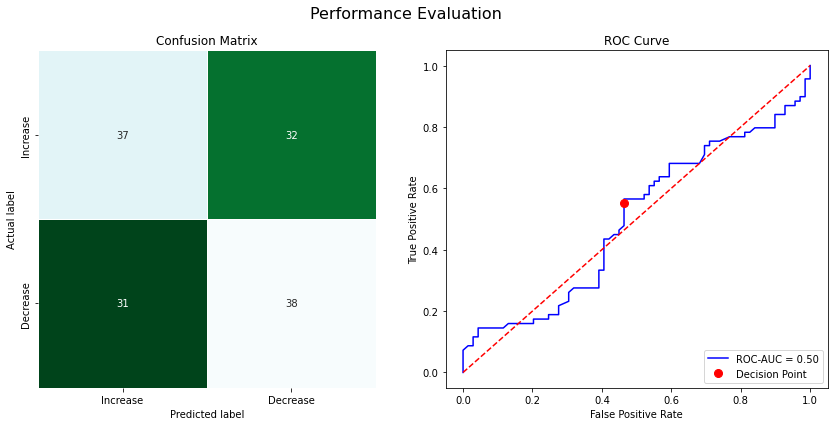

In [59]:
rf_perf = performance_evaluation_report(rf_classifier, 
                                          X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()

In [60]:
rf_perf

{'accuracy': 0.5434782608695652,
 'precision': 0.5428571428571428,
 'recall': 0.5507246376811594,
 'specificity': 0.5362318840579711,
 'f1_score': 0.5467625899280575,
 'cohens_kappa': 0.08695652173913049,
 'roc_auc': 0.49569418189455994,
 'pr_auc': 0.5490092876045642}

{'accuracy': 0.5289855072463768,
 'precision': 0.5285714285714286,
 'recall': 0.5362318840579711,
 'specificity': 0.5217391304347826,
 'f1_score': 0.5323741007194245,
 'cohens_kappa': 0.05797101449275366,
 'roc_auc': 0.547679059021214,
 'pr_auc': 0.5933801206410384}

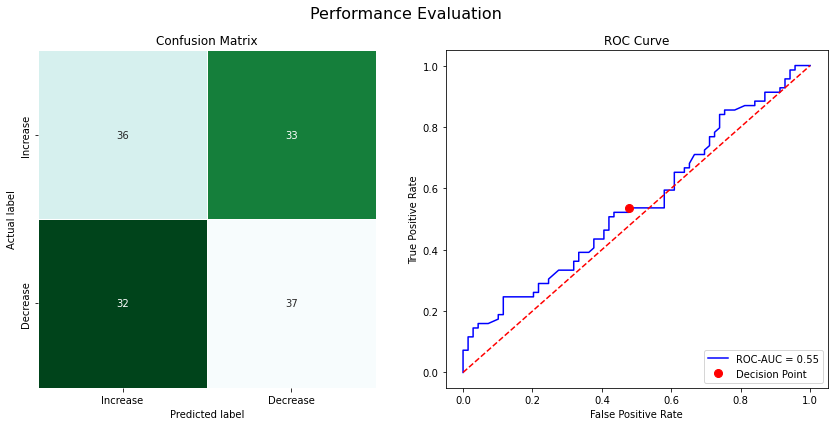

In [61]:
#Fitting a Boosting algorithm
from sklearn.ensemble import GradientBoostingClassifier

%timeit
boost_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42)
boost_classifier.fit(X_train, y_train)
y_pred_boost = boost_classifier.predict(X_test)

boost_perf = performance_evaluation_report(boost_classifier, 
                                          X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

plt.tight_layout()

boost_perf

In [62]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
clf = svm.SVC(gamma='scale',probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [64]:
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [65]:
print('-' * 50)
print('Training set:')
print('Classification report:')
print(classification_report(y_train, y_pred_train))

--------------------------------------------------
Training set:
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55       257
         1.0       0.62      0.68      0.65       293

    accuracy                           0.61       550
   macro avg       0.60      0.60      0.60       550
weighted avg       0.61      0.61      0.60       550



In [66]:
print('.' * 50)
print('Test set:')
print('Classification report:')
print(classification_report(y_test, y_pred))

..................................................
Test set:
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.49      0.52        69
         1.0       0.53      0.58      0.56        69

    accuracy                           0.54       138
   macro avg       0.54      0.54      0.54       138
weighted avg       0.54      0.54      0.54       138

